Problem Statement

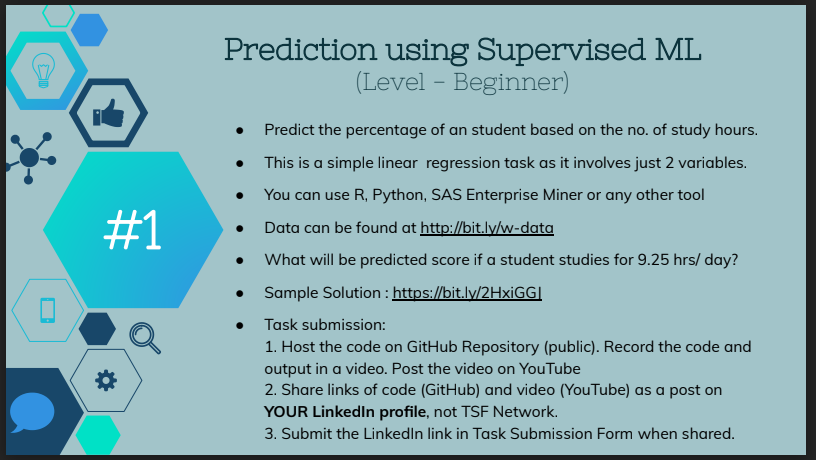

Dataset Link:https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv

We have to predict the percentage of scores scores obtained by the students based on the number of hours as student studies.

We need to create a linear model and try to solve the problem

# Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm,skew
from subprocess import check_output
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Lets import our dataset

In [4]:
dataset = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
#Reading the data from the link provided

In [5]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
dataset.shape

(25, 2)

We have only 25 rows of data and only 2 features in total, Hours and Scores.
Hours is our independent feature and Scores is our Dependent feature

Now checking the Datatype of the data

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Hours is in float and Scores is in int. Also 25 non-null values in our dataset which means no null values as our dataset is itself 25 records.

In [12]:
dataset.isna().sum() #no null values

Hours     0
Scores    0
dtype: int64

Lets plot the distribution of the independent feature i.e "hours".

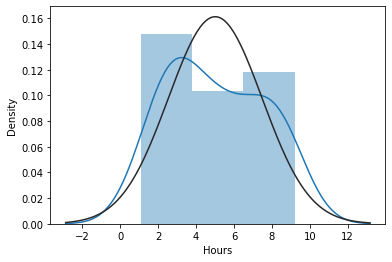

Skewness of the "Hours" column is : 0.1903382010052985


In [36]:
from scipy.stats import norm
norm.fit(dataset["Hours"])
sns.distplot(dataset["Hours"],fit=norm)
plt.show()
print("""Skewness of the "Hours" column is :""",dataset["Hours"].skew() )

Blue kde line above is the distribution of our data and the black kde is for the standard normal distribution. and we can directly compare that the our data is showing two small peaks.

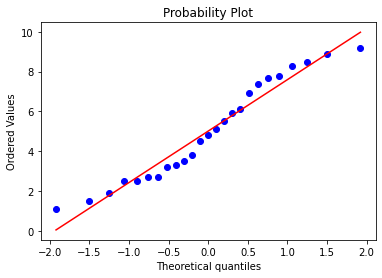

In [37]:
import scipy.stats as stats
stats.probplot(dataset["Hours"],plot = plt)
plt.show()

We can see the data is not much skewed and neither completly normal, we can still work on the data.

Now check the relation between our dependent and independent feature

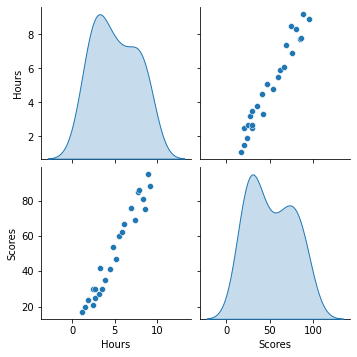

In [51]:
sns.pairplot(dataset,diag_kind="kde")
plt.show()

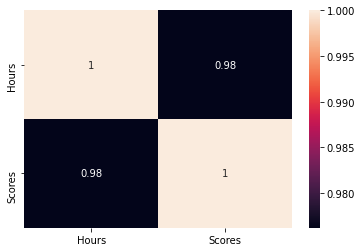

In [48]:
sns.heatmap(dataset.corr(),annot=True)
plt.show()

We can see from the plots above, both the features are highly and positively correlated with each other.

Now we know that the "hours" is a significant feature for predicting the Score of student, we can move ahead to modelling

Splitting the data into X and y

In [59]:
X = dataset.drop("Scores",axis=1)
y = dataset["Scores"]

Now splitting the data into Train and test set 

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 
print("Shape of X_train is:",X_train.shape)
print("Shape of X_test is:",X_test.shape)
print("Shape of y_train is:",y_train.shape)
print("Shape of y_test is:",y_test.shape)

Shape of X_train is: (20, 1)
Shape of X_test is: (5, 1)
Shape of y_train is: (20,)
Shape of y_test is: (5,)


# Modelling

Let us use the linear regression for the model.

Importing the Linear Regression

In [58]:
from sklearn.linear_model import LinearRegression

Now create an instance of LinearRegression

In [64]:
LR = LinearRegression()

Fitting the training data

In [65]:
LR.fit(X_train,y_train)
print("Learning complete")

Learning complete


Now predicting the X_test

In [66]:
y_test_pred = LR.predict(X_test)

# Evaluating the model

Now checking the accuracy of the model on the testing set after predicting

We will be using the r2 score to judge the performance of the model. The value of r2 is between 0 and 1. The more the r2 value closer to the 1, suggest us the model is better.

Importing the r2_score

In [67]:
from sklearn.metrics import r2_score

Caution: r2_score only used to check the performance of the models for regression problems

In [68]:
r2_score(y_test,y_test_pred)

0.9454906892105356

we are getting an approx 0.94 value of the r2_score which suggests us that the performance of the model is extremely good.

Let us judge the performance of the model with one more metric which is root mean squared error. In sklearn we do not have any direct function to calculate RMSE, so instead we calculate MSE which is Mean squared error and then we take the root of the value to get the RMSE (Lower is better).

In [70]:
from sklearn.metrics import mean_squared_error

In [77]:
mse = mean_squared_error(y_test,y_test_pred)
print("MSE:",mse.round(2))

MSE: 21.6


In [78]:
RMSE = np.sqrt(mse)
print("RMSE: ",RMSE)

RMSE:  4.6474476121003665


We are also getting low RMSE value which suggest us the model is performing good on the test data

# Fitting the whole data in the instance

In [80]:
LR.fit(X,y)

LinearRegression()

Now our model is trained.

In [88]:
coef = LR.coef_
print("coefficient of ur model equation is:",coef)

coefficient of ur model equation is: [9.77580339]


In [90]:
intercept = LR.intercept_
print("Intercept of ur model equation is:",intercept)

Intercept of ur model equation is: 2.483673405373196


Our Final linear model equation will be

Scores = 2.48 + Hours * 9.77

Key points:

1) If the student do not studies at all, he will get atleast 2.48 percent Score

2) With unit increase in the study hours the Score of the student will increase by 9.77 points.

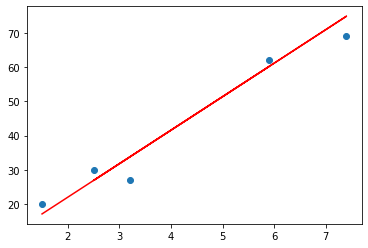

In [99]:
# Plotting the regression line for the test data
l = intercept + coef*X_test
plt.scatter(X_test, y_test)
plt.plot(X_test, l,"r");
plt.show()

Here we can see our best fit line passes closely to most of the time also indicating us that the error is minimal.

Let us predict the scores of the students given the hours for which the student studies.

Predictive score of the student if he studies 9.25 hours/day.

In [116]:
hours_studied = [[9.25]]

In [126]:
Scores_obtained = LR.predict(np.array([hours_studied]))

In [141]:
print("The scores obtained by student who studied",hours_studied[0],"hours per day got",Scores_obtained[0].round(3),"percent.")

The scores obtained by student who studied 9.25 hours per day got 92.91 percent.


As we had the model equation we can also calculate it manually as well.

In [135]:
Hours = 9.25
Scores = LR.intercept_ + Hours * LR.coef_

In [142]:
print("The scores obtained by student who studied",Hours,"hours per day got",Scores.round(3)[0],"percent.")

The scores obtained by student who studied 9.25 hours per day got 92.91 percent.


# THANKS

Link1 comment: 
https://www.linkedin.com/feed/update/urn:li:ugcPost:6773136312066179072?commentUrn=urn%3Ali%3Acomment%3A%28ugcPost%3A6773136312066179072%2C6774391446037413888%29

Link2 comment: https://www.linkedin.com/feed/update/urn:li:ugcPost:6773976104559636480?commentUrn=urn%3Ali%3Acomment%3A%28ugcPost%3A6773976104559636480%2C6774392677346664448%29

Link3 comment: https://www.linkedin.com/feed/update/urn:li:activity:6774283348413087745?commentUrn=urn%3Ali%3Acomment%3A%28activity%3A6774283348413087745%2C6774393215354253312%29

link4 comment: https://www.linkedin.com/feed/update/urn:li:ugcPost:6774026650494500864?commentUrn=urn%3Ali%3Acomment%3A%28ugcPost%3A6774026650494500864%2C6774394564506644481%29

Link5 comment: https://www.linkedin.com/feed/update/urn:li:activity:6773551506173108224?commentUrn=urn%3Ali%3Acomment%3A%28activity%3A6773551506173108224%2C6774395573987536897%29